# Attention !!!
- Please write or take a screenshot of all answers in the pdf file. You won't be graded if there is no pdf file in the submission.
- Only TODO 1, 2, 3, 4, 5, 6, 10, 11 will be graded.
- **Extra credit:** 1% of total grade for Com Eng Math 2 for TODO 7, 8, 9 (1/3 each.)

# Sampling

Sampling is a process that is very important for writing simulations. In this section, you will try to sample from some common distributions.

TODO#1: Write functions that samples from the following distribution
1. $\mathcal{N}(0,1)$
2. $Bernoulli(0.3)$
3. $B(10, 0.3)$
4. $Multinomial(n=10, p=[0.3,0.2,0.5])$
5. $U(0,1)$
<!-- 6. $T(0,1)$; $T(a,b)$ is defined as a function with a shape of a triangle that pass through point $(a,0)$, $(b,0)$, and $(b, K):\frac{(b-a)K}{2}=1$. -->
6. $T(0,1)$; $T(a,b)$ is defined as a function with a shape of a triangle that pass through point $(a,0)$, $(b,0)$, and $(\frac{a+b}{2}, K):\frac{(b-a)K}{2}=1$.

Capture screenshot of the histogram for each of the distribution and paste them on the pdf file. The example is shown below.

Hint: see scipy.stats for common distributions.
[plt.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) should be helpful for plotting histograms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, bernoulli, binom, multinomial, uniform, expon, triang


def sample_normal(sample_size=10, mu=0, std=1):
  sample = norm.rvs(size=sample_size,loc=mu, scale=std)
  return sample


def sample_bernoulli(sample_size=10, p=0.3):
  sample = bernoulli.rvs(size=sample_size, p=p)
  return sample


def sample_binomial(sample_size=10, n=10, p=0.3):
  sample = binom.rvs(size=sample_size, n=n, p=p)
  return sample


def sample_multinomial(sample_size=10, n=100, p=[0.3, 0.2, 0.5]):
  sample = multinomial.rvs(size=sample_size, n=n, p=p)
  return sample

def sample_uniform(sample_size=10, from_x=0, to_x=1):
  sample = uniform.rvs(size=sample_size, loc=from_x,scale=to_x-from_x)
  return sample
# loc is started point, scale is scaling value to end point
def sample_triangle(sample_size=10, a=0, b=1):
  # c argument is x at peak value and from formula (b-a)*k = 2 it's lead k equal 2, it's mean peak value is k
  c = 0.5
  sample = triang.rvs(size=sample_size, loc=a, scale=b-a, c=c)
  return sample

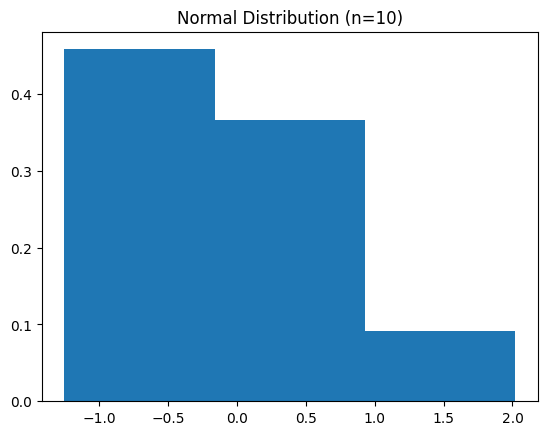

In [2]:
# Histohgram of normal distribution
sample = sample_normal()
plt.hist(sample, density=True, bins=3)
plt.title('Normal Distribution (n=10)')
plt.show()


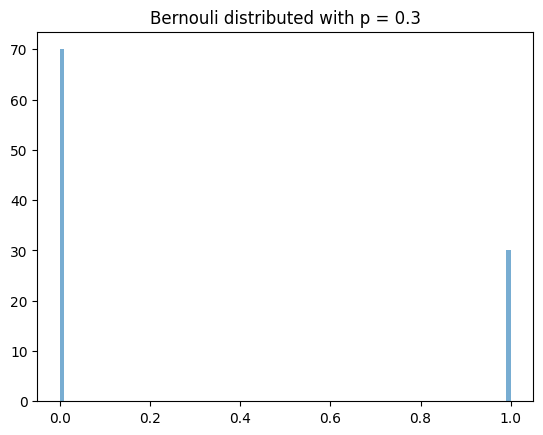

In [3]:
bernul = sample_bernoulli()
plt.hist(bernul, density=True, bins=100, alpha=0.6)
plt.title("Bernouli distributed with p = 0.3")
plt.show()

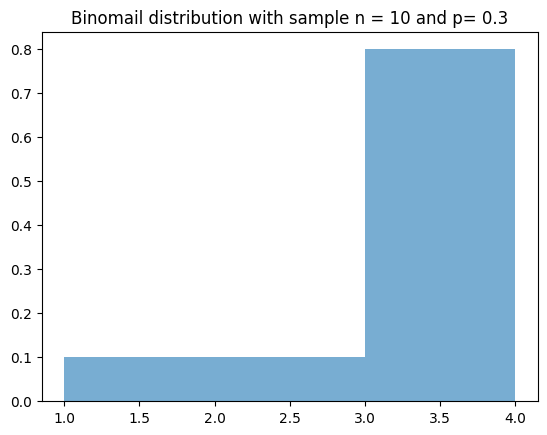

In [4]:
binomail_sample = sample_binomial()
plt.hist(binomail_sample, density=True, bins=3, alpha=0.6)
plt.title("Binomail distribution with sample n = 10 and p= 0.3")
plt.show()

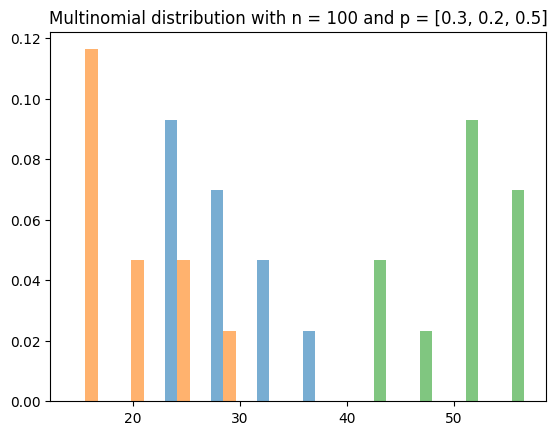

In [5]:
multimodel = sample_multinomial()
plt.hist(multimodel, density=True, bins=10, alpha=0.6)
plt.title("Multinomial distribution with n = 100 and p = [0.3, 0.2, 0.5]")
plt.show()

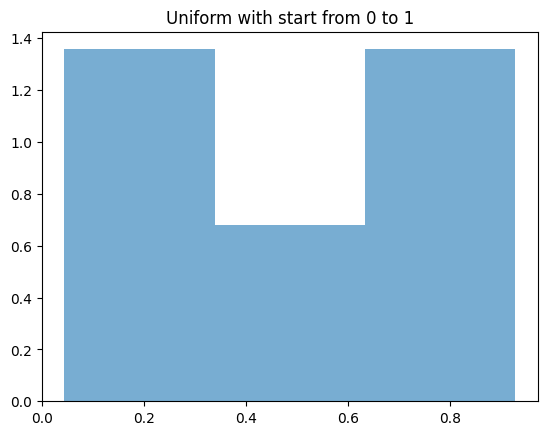

In [6]:
uni = sample_uniform()
plt.hist(uni, density=True, bins=3, alpha=0.6)
plt.title("Uniform with start from 0 to 1")
plt.show()

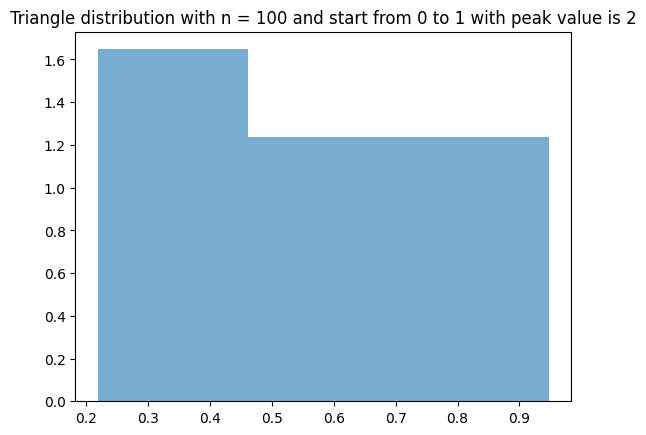

In [7]:
triangle_sample = sample_triangle()
plt.hist(x=triangle_sample, density=True, bins=3, alpha=0.6)
plt.title("Triangle distribution with n = 100 and start from 0 to 1 with peak value is 2")
plt.show()

# Law of large number


### Law of large number

**TODO#2:** Using a sampling function from TODO#1.1, Plot the graph that shows the relation between an empirical mean and sampling size from 1 up to 10000.
What does the graph imply about the difference between the empirical mean and the theoritical mean?

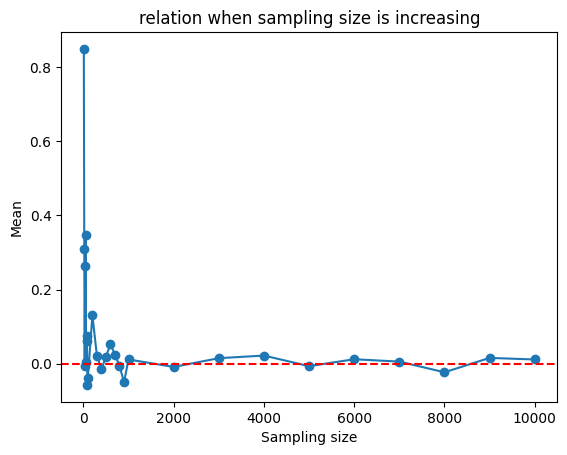

In [8]:
import numpy as np
sampling_sizes = np.array([k*10 for k in range(1,10)]+[j*100 for j in range(1,10)]+[i*1000 for i in range(1,11)])
# print(sampling_sizes)
means = [sum(sample_normal(sample_size=s))/s for s in sampling_sizes]
# print(means)
plt.plot(sampling_sizes, means, 'o-')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Sampling size")
plt.ylabel("Mean")
plt.title("relation when sampling size is increasing")
plt.show()


### Law of large number for histogram

The histogram is used to approximate the PDF of an unknown distribution.
The bin in the histogram represents the frequency of the event happening inside the bin range.

**TODO#3:** Given a fix bin number of 40. Plot the histogram of the data sampling from the function, `sample_normal(n, 0, 1)`, for different sizes of sample: 500, 1k, 5k and 10k.
Compare and explain the relation between the approximation given by the histogram and the true PDF for each of the sample size.

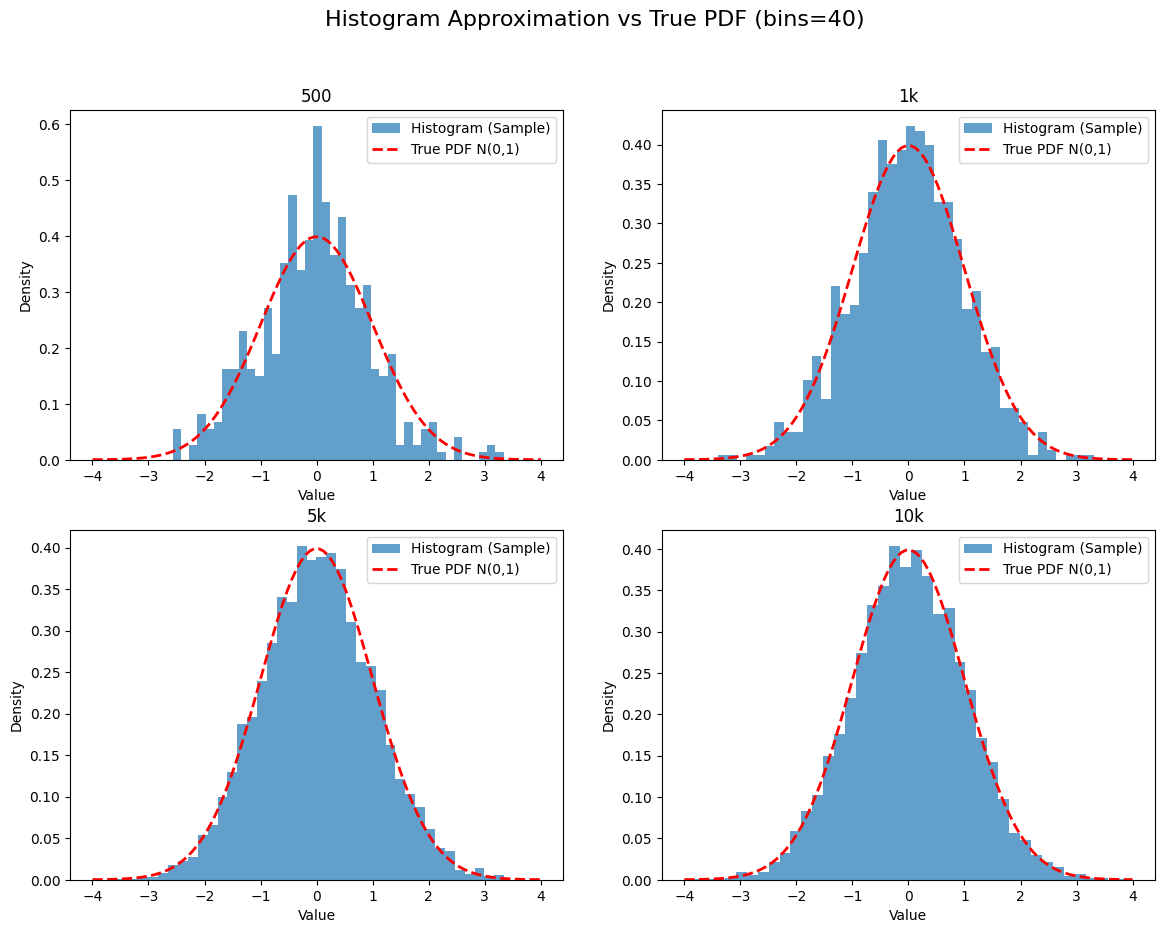

In [9]:
sample_500 = sample_normal(sample_size=500)
sample_1k = sample_normal(sample_size=1000)
sample_5k = sample_normal(sample_size=5000)
sample_10k = sample_normal(sample_size=10000)
samples = [sample_500, sample_1k, sample_5k, sample_10k]
sizes  = ['500','1k','5k','10k']
x_pdf = np.linspace(-4, 4, 100)
y_pdf = norm.pdf(x_pdf, 0, 1)
# second argument is mean value, and the last is standard derivation

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for i in range(len(samples)):
    ax = axes[i]
    sample_data = samples[i]
    title = sizes[i]

    ax.hist(sample_data, density=True, bins=40, alpha=0.7, label='Histogram (Sample)')

    ax.plot(x_pdf, y_pdf, 'r--', linewidth=2, label='True PDF N(0,1)')

    ax.set_title(title)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()

plt.suptitle('Histogram Approximation vs True PDF (bins=40)', fontsize=16)
plt.show()


# จากกราฟจะเห็นว่า ยิ่ง sample size มากขึ้นเรื่อยๆความแม่นยำก็ยิ่งมากขึ้นเรื่อยๆ โดยเฉพาะ 10k จะเห็นว่า มีความคล้ายคลึงกับ Normal distribution แบบ Ideal มากๆ
# โดยเฉพาะตอน sample size = 500 จะเห็นว่า histrogram จะมีความดีดมากๆ และ ขรุขระ มาก แต่เมื่อเพิ้ม sample size ความขรุขระ จะลดลงเรื่อยๆ

## Central limit theorem

In this part we will use the Central Limit Theorem to approximate the true probabity of getting more than 40 heads when an unfair coin, with the probability 0.3 of being head, is tossed 100 times.


**TODO#4:** Simulate multiple coin tosses to construct a histrogram from the outcomes. Plot the histogram. Hint: x-axis should represents the number of heads when the coin is tossed 100 times. Does this histogram looks like a normal distribution?

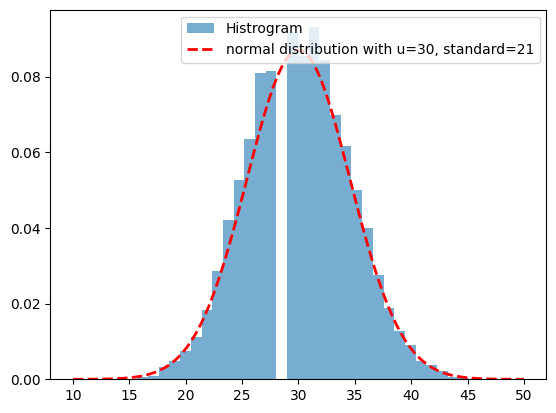

In [10]:
n = 100
p = 0.3
# we will use sample_binomail to create distrition of tossed coin with p = 0.3 and 100
# assume sample_size considered high value because it easy to see what kind of distribtion it is.
sample_tosses = sample_binomial(sample_size=10000,n=n, p=p)
# sample ในแต่ละครั้งก็คือจำนวนหัวที่เกิดขึ้นในแต่ละ n ทำให้เข้าสู่สูตร Sn = X1 + X2 + .. + Xn ใน CLT
x_normal = np.linspace(10,50,100)
# mean of binomial distribution is n*p and standard derivation is sqrt(np*(1-p))
y_normal = norm.pdf(x_normal, n*p, np.sqrt(n*p*(1-p)))
plt.hist(sample_tosses, bins=40, density=True, alpha=0.6, label="Histrogram")
plt.plot(x_normal, y_normal, 'r--', linewidth=2, label="normal distribution with u=30, standard=21")
plt.legend()
plt.show()
# จากภาพจะเห็นว่า Histrogram จะมีความเหมือน Normal distribtion เป็นอย่างมาก
# โดยค่า P จะเปลี่ยนรูปแบบการกระจายของกราฟทำให้ค่าเบ้ขวาแต่เมื่อ n มากๆมันจะทำให้
# ผลลัพธ์ของการเบ้ จะหายไปเพราะค่าจากทั้งสองฝั่งมันมีค่ามาก

**TODO#5:** Use CLT to find the probability of getting more than 40 heads.

**TODO#6:** Compare and find the difference between CLT's approximation and the actual probability using the binomial distribution.

In [11]:
# ข้อ 5
# เราจะใช้การเปิดตาราง Z เพราะว่าเราได้ว่ากราฟมีความเป็น normal distribution (ถ้าทำมือ)
# แต่ scipy.stat สามารถ หา cdf จาก method cdf ได้ เช่น norm.cdf

u = n*p
s = round(np.sqrt(n*p*(1-p)),4)
z_value = (40.5-u)/s
# ใช้ 40.5 เพราะเรามองว่า Area ของ >= 41 คือเริ่มตั้งแต่ 40.5 เพราะแต่ละค่าที่เป็น distribut กว้าง 1
# print(z_value)
prob_from_left = norm.cdf(z_value)
prob_gte_41 = 1-prob_from_left
print(round(prob_gte_41,4))

0.011


In [12]:
# ข้อ 6
prob_le_40 = binom.cdf(k=40, n=n, p=p)
prob_gt_40 = 1 - prob_le_40
print(round(prob_gt_40,4))
# จะเห็นว่าค่าที่ได้ใกล้เคียงกับ CDF โดยใช้ normal distribton มากๆ

0.0125


# Algebra of Random Variables

Given an independent random variable $X$ and $Y$, such that $X \sim F$ and $Y \sim U(3,5)$. The summation of those two is written as $Z = X + Y$ and the PDF of $F$ is defined below.
$$
F(X) =
\begin{cases}
0.1, & -2<=X<=0\\
0.4, & 0<X<=2 \\
\end{cases}
$$
**TODO#7:** Find $P( 3 < Z < 5 )$.

In [15]:
from scipy.integrate import quad
def fx(x):
  if -2 <= x and x <= 0:
    return 0.1
  if 0 < x and x <= 2:
    return 0.4
  return 0
def fy(y):
  if y < 3 or y > 5:
    return 0
  return 1/2

def intergrate_z(x,z):
  return fx(x)*fy(z-x)

def fz(z):
  result = quad(func=intergrate_z, a=-np.inf,b=np.inf,args=(z,))
  # argument a, b จะป้อนเข้า intergrateeที่ parameter ตัวแรกโดยอัตโนมัติ แต่ args(z,) เป็นการบอกว่า parameter ตัวที่สอง ให้ป้อนค่า z เข้าไป
  return result[0]
prob = quad(func=fz, a=3,b=5)
print(f"ความน่าจะเป็น P(3 < Z < 5) คือ: {prob[0]:.4f}")
# ใช้หลัการ sum of random variables ที่ใช้งาน Convolution ของสอง fx และ fy
# fx+y(z) = (fx * fy)(z)
# ชวงแรก z < 1 มีค่าเท่ากับ 0 เพราะไม่ทับกัน
# ช่วงสอง 1 <= z < 3
# ช่วงสาม 3 <= z < 5
# ช่วง 4 z>=5

ความน่าจะเป็น P(3 < Z < 5) คือ: 0.5000


# Correlation

The correlation captures the linear relationshi between two sets of random variables. The higher magnitude of the correlation indicates a stronger relationship.


**TODO#8:** Find the correlation of $X$ and $Y = X + A$, given that $X \sim U(-1,1)$ and
1. $A = 10$
2. $A \sim U(-1,1)$
3. $A \sim U(-10,10)$
4. $A \sim U(-100,100)$


**TODO#9:** From the results in TODO#8, answer following questions
1. Does the correlation decrease as we increase the randomness of A ?
2. Explain the result when we change from $A \sim U(-10,10)$ to $A \sim U(9090,10010)$. Hint: Compare the result with $A$ and $A + 10000: A \sim U(-10,10) $

In [16]:
# ข้อ 8
# correlation = Cov(x,y)/sqrt(var(x)*var(y))
size = 1000
x = sample_uniform(sample_size=size, from_x=-1,to_x=1)
a1 = sample_uniform(sample_size=size, from_x=-1,to_x=1)
a2 = sample_uniform(sample_size=size, from_x=-10,to_x=10)
a3 = sample_uniform(sample_size=size, from_x=-100,to_x=100)

y1 = x + 10
correlation_1 = np.corrcoef(x,y1)
# print(correlation)
# [[pxx, pxy],[pyx,pyy]]
print(correlation_1[0,1])

y2 = x+a1
correlation_2 = np.corrcoef(x,y2)
print(correlation_2[0,1])

y3 = x+a2
correlation_3 = np.corrcoef(x,y3)
print(correlation_3[0,1])

y4 = x+a3
correlation_4 = np.corrcoef(x,y4)
print(correlation_4[0,1])

0.9999999999999998
0.6912092074340993
0.1106737006832169
0.05643575482166692


In [17]:
# ข้อ 9
print(f'9.1 ตอบ ใช่')

y5 = x + 10000
correlation_5 = np.corrcoef(x,y5)
print(f'correlation ของ x+ 10000: {correlation_5[0,1]}')
print(f'correlation ของ x+ U(-10,10): {correlation_3[0,1]}')

y6 = y5 + a2
correlation_6 = np.corrcoef(x,y6)
print(f'correlation ของ x+ U(-10,10) + 10000: {correlation_6[0,1]}')
print('จะเห็นว่า correlation ของ x+U(-10,10) กับ x+ U(-10,10) + 10000 แทบไม่ต่างกันเพราะค่าคงที่แทบจะไม่ส่งผลกับCorrelation')
print('อีกทั้งค่าคงทีทำหน้าที่เพียงแค่ shift ค่าออกไปแต่ไม่ได้ส่งผลต่อ Variance และ Covariance ทำให้ correlation ไม่เปลี่ยนแปลงมาก')

9.1 ตอบ ใช่
correlation ของ x+ 10000: 1.0
correlation ของ x+ U(-10,10): 0.1106737006832169
correlation ของ x+ U(-10,10) + 10000: 0.11067370068321104
จะเห็นว่า correlation ของ x+U(-10,10) กับ x+ U(-10,10) + 10000 แทบไม่ต่างกันเพราะค่าคงที่แทบจะไม่ส่งผลกับCorrelation
อีกทั้งค่าคงทีทำหน้าที่เพียงแค่ shift ค่าออกไปแต่ไม่ได้ส่งผลต่อ Variance และ Covariance ทำให้ correlation ไม่เปลี่ยนแปลงมาก


# Hamtaro and his cloud storage empire.



After the success in the manufacturing business. Hamtaro wants to expand his business into a new sector.
Since cloud computing is currently booming, he decides to enter into the cloud storage business.

The storage disk that Hamtaro uses can operate only in the temperature of $[0,30]$ degree Celcius. The disk has the prabability of a read failure $P(Fail|t) = \frac{0.97}{2250}(t-15)^2+0.001$ where $t$ is the operating temperature.
<!-- Hamtaro's disks has a special architecture that can be  simultaneously read by infinite requests at the same time. However, a failure of one request will cause all of its parallels to fail. -->

Since Hamtoro doesn't want any failures in his service, he decides to buy a super luxury air-conditioning system to control the temperature in his data warehouse. Even if the air conditioner is extremely expensive, the room temperature is still not stable. When Hamtaro tries to set the tempurature to $\mu$, the actual temperature is random and can be modeled by $t\sim U(\mu-1,\mu+1)$.

**TODO#10:** Answer the following questions.
1. What is the temperature that Hamtaro should set the air conditioner to? Justify your answer.
2. What is the probability of failure at the temperature used in part 1?
<!-- 3. If Hamtaro want to handle 10k concurrent requests, what is the minimum disks should Hamtoro has to make 99.99% of disk availability and how should he split the workloads? Hamtaro connects the all the disks in parallel. The read request will fail if all disks fail to be read at the same time. -->
3. What is the minimum number of disks that Hamtoro has to use to make sure that the probability of having more than 1 failure in 10k requests is less than 0.01\%? Hamtaro connects the all the disks in parallel. The read request will fail if all disks fail to at the same time.
4. **Extra** The temperature is now modeled by $t\sim \mathcal{N}(\mu,9)$ instead of $t\sim U(\mu-1,\mu+1)$. Repeat question 1-3.

**Hint:** `scipy.integrate.quad` can help you do integration.

In [18]:
# ข้อ 1 ตอบ u = 15 เพราะ จะทำให้ t มีค่าเฉลี่ยเท่ากับ 15 ซึ่งทำให้ term แรกของ P มีค่าเป็น 0 ทำให้ P มีค่า 0.001
print('ข้อ 1. ตอบ u = 15 เพราะ จะทำให้ t มีค่าเฉลี่ยเท่ากับ 15 ซึ่งทำให้ term แรกของ P มีค่าเป็น 0 ทำให้ P มีค่า 0.001')
# ข้อ 2 หา expected value ที่จะ fail โดยใช้ intergrate(fn*gn)
from scipy.integrate import quad
def fn(x):
    return ((0.97/2250)*(x-15)**2 + 0.001)*0.5

p = quad(a=14,b=16,func=fn)
print(f'ข้อ 2. ตอบ มีความน่าจะเป็นที่จะ Fail เท่ากับ: {round(p[0],4)}')


ข้อ 1. ตอบ u = 15 เพราะ จะทำให้ t มีค่าเฉลี่ยเท่ากับ 15 ซึ่งทำให้ term แรกของ P มีค่าเป็น 0 ทำให้ P มีค่า 0.001
ข้อ 2. ตอบ มีความน่าจะเป็นที่จะ Fail เท่ากับ: 0.0011


In [19]:
# ข้อ 3 จาก all disk failur at the same time ถึงจะ read fail จะได้ว่า p = p^N โดย n คือจำนววน disk ที่กำลังหา
# ให้ n = 10000 คือจำนวน request ที่เข้ามา
idx = 1
result = 0
while(True):
  pi = p[0]**idx
  idx+=1
  at_least_fail = binom.cdf(1, 10000,pi)
  # argument แรกคือค่าที่จะสำเร็จ 1 ครั้งคือมี fail 1 ครั้ง
  check = 1 - at_least_fail
  if (check < 0.0001):
    # < 0.01% = 0.0001
    result = check
    break
print(f'จำนวน disk ที่ต้องใช้คืดเป็นจำนวน {idx}')
print(f'ข้อ 3. ตอบ มีความน่าจะเป็นที่จะ Fail เท่ากับ: {round(result,6)}')

จำนวน disk ที่ต้องใช้คืดเป็นจำนวน 3
ข้อ 3. ตอบ มีความน่าจะเป็นที่จะ Fail เท่ากับ: 8.5e-05


In [20]:
# ข้อ 4.
# ข้อ 4.1 ให้ u = 15 เพราะ probability ที่ u = 15 มีค่าสูงที่สุด
print('ข้อ 4.1. ตอบ u = 15 เพราะ จะทำให้ t มีค่าเฉลี่ยเท่ากับ 15 ซึ่งทำให้ term แรกของ P มีค่าเป็น 0 ทำให้ P มีค่า 0.001 อีกทั้งโอกาสที่ t = 15 มีค่าสูงที่สูงที่สุดจาก normal distribution')
# ข้อ 4.2
x = np.linspace(10,30,100)
# gn = norm.pdf(x,15,9)
# plt.plot(x,gn, 'r--', linewidth=2)
def gn(x):
  return norm.pdf(x,15,3)
def fn_1(x):
  return ((0.97/2250)*(x-15)**2 + 0.001)*gn(x)
p = quad(func=fn_1, a=10,b=30)
print(f'ข้อ 4.2. ตอบ มีความน่าจะเป็นที่จะ Fail เท่ากับ: {round(p[0],6)}')

ข้อ 4.1. ตอบ u = 15 เพราะ จะทำให้ t มีค่าเฉลี่ยเท่ากับ 15 ซึ่งทำให้ term แรกของ P มีค่าเป็น 0 ทำให้ P มีค่า 0.001 อีกทั้งโอกาสที่ t = 15 มีค่าสูงที่สูงที่สุดจาก normal distribution
ข้อ 4.2. ตอบ มีความน่าจะเป็นที่จะ Fail เท่ากับ: 0.004003


In [21]:
# ข้อ 4.3
idx = 1
result = 0
while(True):
  pi = p[0]**idx
  idx+=1
  at_least_fail = binom.cdf(1,10000,pi)
  check = 1 - at_least_fail
  if (check < 0.0001):
    result = check
    break
print(f'ข้อ 4.3. ตอบ มีความน่าจะเป็นที่จะ Fail เท่ากับ: {round(result,7)}')
print(f'จำนวน disk ที่ต้องใช้คืดเป็นจำนวน {idx}')

ข้อ 4.3. ตอบ มีความน่าจะเป็นที่จะ Fail เท่ากับ: 2e-07
จำนวน disk ที่ต้องใช้คืดเป็นจำนวน 4


# Moontaro
![picture](https://i.redd.it/mcveltqx2j071.png)

Recently, cryptocurrency investment has become extremely popular due to its extraordinarily high rates of return. Though many people consider it a risky investment, Hamtaro does not want to miss this opportunity and start gathering information about these coins. His research suggests that four coins, namely $a$, $b$, $c$, and $d$, have a promising future to go to the moon.


Hamtaro wants to run simulations to validate his chances. As the value of the coins is non-deterministic, he models it sequentially based on their historical values (a.k.a. autoregressive model). The price of coin $i$ at day $t$ is formulated as

$p_{i,t} = p_{i,t-1} \times r_{i,t}$, where $i \in \{a, b, c, d\}$, and  $p_{i, 0} = 10$.

The rates $r_{i,t}$, are drawn from a multivariant guassian distribution $\mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma})$, where $\mu = [1.003, 1.002, 1.004, 1.004]^T$ and $\mathbf{\Sigma}$ as given below:

$\mathbf{\Sigma}$ | a | b | c | d
--- | --- | --- | --- |---
a |  10 x 10$^{-3}$ | 0 | 4 x 10$^{-3}$ | 5 x 10$^{-3}$
b |  0  | 3 x 10$^{-3}$ | 0 | 0
c |  4 x 10$^{-3}$  | 0 | 12 x 10$^{-3}$| 2 x 10$^{-3}$
d |  5 x 10$^{-3}$  | 0 | 2 x 10$^{-3}$ | 15 x 10$^{-3}$


<!-- 1. Are $p_{a,t}$ and $p_{b,t}$ independent ? Why ?
2. Are $p_{a,t}$ and $p_{c,t}$ independent ? Why ?
3. Are $p_{a,t}$ and $p_{d,t}$ independent ? Why ? -->

**TODO11:**
1. Which pairs of coins are independent? Why?
2. Given the following definitions:
  - <b>Return</b> :  a coin price at day $T$ minus the price at day 0, i.e., the return of coin $i$ at day $T = p_{i,T} - p_{i, 0}$.
  - <b>Expected return</b> : the average return from 10000 distinct simulated end prices.
  
  Simulate the expected return for each coin if Hamtaro wants to sell his coins 30 and 180 days after buying $(T \in \{30, 180\})$.
  hint: you should write reusable functions to make your life easier.
3. Which coin has the highest probability of having profit (end price is higher than start price)? Compare the variance of the return with other coins.
4. How can the expected return be positive while having around 50\% chance of profitability?

After simulating the price of individual coins, Hamtaro now proposes seven investment strategies (portfolio) to maximize the profit. The detail of each strategy is shown in the table below.  

Strategy | Buy $a$ | Buy $b$ | Buy $c$ | Buy $d$ | Expected\[return\] | Variance\[return\] | Probability of having profit
---| --- |--- |--- | ---| --- | --- | ---
1  | 100% | 0%   | 0%  |    0%|  |  |
2  | 0%   | 100% | 0%  |    0%|  |  |
3  | 0%   | 0%   | 100%|    0%|  |  |
4  | 0%   | 0%   |   0%|  100%|  |  |
5  | 50%  | 50%  | 0%  |    0%|  |  |
6  | 50%  | 0%   | 50% |    0%|  |  |
7  | 50%  | 0%   |  0% |   50%|  |  |

5. Fill the empty values in the table (both $T = 30, 180$).
6. Which strategy yields the highest return?
7. Which strategy is the safest one?
8. Compare the variances between the stategy 6 and 7. What happens, and why is this the case? **Hint:** Consider cov($r_a$, $r_c$) and cov($r_a$, $r_d$).
9. From the problems above, come up with a general practice for good investment? Please also state your reasoning. You can include additional simulations to support the argument.

In [22]:
# จาก sigma ที่ให้มา (covariance matrix)
print(f'ข้อ 1 ตอบ จะเห็นว่า cov(b,a), cov(b,c), cov(b,d) มีค่าเท่ากับ 0 ทำใหั้ correlation เป็น 0 ด้วยทำให้เป็นเหรียญที่ Independent กับเหรียญอื่น')

ข้อ 1 ตอบ จะเห็นว่า cov(b,a), cov(b,c), cov(b,d) มีค่าเท่ากับ 0 ทำใหั้ correlation เป็น 0 ด้วยทำให้เป็นเหรียญที่ Independent กับเหรียญอื่น


In [39]:
# ข้อ 2
import numpy as np
from tqdm import tqdm
from scipy.stats import multivariate_normal

coin_name = ['a', 'b', 'c', 'd']
init_prices = np.array([10, 10, 10, 10]) # ตั้งราคาเหรีญเริ่มต้นไว้ที่ 10

rate_mean = np.array([ 1.003, 1.002, 1.004, 1.004])
rate_cov  = np.array([
                [10, 0, 4, 5],
                [ 0, 3, 0, 0],
                [ 4, 0,12, 2],
                [ 5, 0, 2,15],
                ])/1000

def get_profit_prob(coin):
  return (coin > 0).sum()/len(coin)
def get_rate():
  rates = multivariate_normal.rvs(rate_mean, rate_cov, size=1)
  # สุ่มสี่ค่าออกมาโดยอิงตาม covariance
  m = np.maximum(0, rates) # ป้องกัน rate ติดลบ
  return m
def get_coin_price(prev_price):
  today_rates = get_rate() # สุ่ม rate ของวันนี้
  return prev_price * today_rates, today_rates

def get_returns(days, lab):
  # ndays คือจำนวนวันที่จำลอง
  # ntrials คือจำนวนการทดลองที่จะทำ
  N_coins = len(init_prices)
  returns = np.zeros((N_coins, lab))
  # จะได้ return ออกมา 4 row 10000 col เพื่อทำการเก็บผลลัพธ์ของแต่ละการทดลอง
  # โดยแถวคือ เหรียญที่ i และ column คือการทดลองที่ j
  for nt in tqdm(range(lab), disable=False):
    # วนซ้ำ 10000 simulate ตามที่โจทย์ต้องการ
    prices = np.zeros((N_coins, days + 1))
    rates  = np.zeros((N_coins, days + 1))
    prices[:,0] = init_prices
    # กำหนดให้ column แรกเป็น price ในวันแรก
    for t in range(1, days+1):
      # วนซ้ำตั้งแต่วันที่ 1 ถึงวันที่กำหนดในที่นี้ก็จะมี 30,180 วัน
      prices[:, t], rates[:, t] = get_coin_price(prices[:, t-1])

    returns[:, nt] = prices[:, days] - prices[:, 0]
    # ผลลัพธ์ของวันท้ายเก็บค่าลงใน column ของการทดลองแต่ละครั้ง
    # โดยเป็นไปตาม definition ของ Return
  return returns

In [41]:
days_choices = [30, 180]
return_of_days = dict()

for n_days in days_choices:
  return_of_days[n_days] = get_returns(n_days, lab=10000)
  print(f"จำนวนวัน={n_days}")
  print("Coin\tAvg_returns\tVariances\tProfit_probaility")
  for coin in range(len(coin_name)):
    # วนลูปของแต่ละเหรียญของแต่ละช่วงเวลาที่กำหนด
    coin_return = return_of_days[n_days][coin]
    # นำค่าของแถว coin แต่ละแถวมาหาค่าทางสถิติ
    print("{}\t{:.5e}\t{:.5e}\t{}".format(
        coin_name[coin],
        np.mean(coin_return),
        np.var(coin_return),
        get_profit_prob(coin_return)
    ))

100%|██████████| 10000/10000 [01:24<00:00, 118.45it/s]


จำนวนวัน=30
Coin	Avg_returns	Variances	Profit_probaility
a	8.42056e-01	3.97344e+01	0.4495
b	6.49780e-01	1.05504e+01	0.5231
c	1.17247e+00	5.29149e+01	0.4618
d	1.23988e+00	7.13867e+01	0.4385


100%|██████████| 10000/10000 [08:13<00:00, 20.26it/s]

จำนวนวัน=180
Coin	Avg_returns	Variances	Profit_probaility
a	7.55319e+00	1.31589e+03	0.3989
b	4.45929e+00	1.53357e+02	0.5546
c	1.13972e+01	3.31619e+03	0.4108
d	1.10453e+01	5.03806e+03	0.3508


In [42]:
print('ข้อ 3 ตอบ เหรียญ b มี probability ในการได้กำไรมากที่สุด')
print('ข้อ 4 ตอบ เพราะแม้ความน่าจะเป็นจะต่ำกว่า 0.5 แต่มูลค่าที่เราได้กลับมาจากการลงทุน เมื่อชนะได้ 1 ครั้งมีมูลค่าสูงมากจนทำให้ Expected return value เป็นบวกได้')

ข้อ 3 ตอบ เหรียญ b มี probability ในการได้กำไรมากที่สุด
ข้อ 4 ตอบ เพราะแม้ความน่าจะเป็นจะต่ำกว่า 0.5 แต่มูลค่าที่เราได้กลับมาจากการลงทุน เมื่อชนะได้ 1 ครั้งมีมูลค่าสูงมากจนทำให้ Expected return value เป็นบวกได้


In [43]:
strategy = np.array([
              [1.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 1.0],
              [0.5, 0.5, 0.0, 0.0],
              [0.5, 0.0, 0.5, 0.0],
              [0.5, 0.0, 0.0, 0.5],
])

In [44]:
# ข้อ 5

for d in [30, 180]:
  return_of_coins = return_of_days[d]
  print(f"days {d}")
  print("strategy\t\t\texp_return\tvariance\tprofit_prob")
  for s in strategy:
    weighted_return = np.array([s[i] * return_of_coins[i] for i in range(len(coin_name))]).sum(axis=0)
    # ทำการคูณค่าที่ลงทุนไปในแต่ละเหรียญเข้ารกับ return ของ coin จากนั้นหาผลรวมของแต่ละ column จะได้ออกมาเป็น return ของแต่ละการ simulation
    port_return = weighted_return.mean()
    port_var = weighted_return.var()
    port_profit_prob = get_profit_prob(weighted_return)
    # หาค่าทางสถิติต่างๆ
    print("{}   \t{:e}\t{:e}\t{}".format(s, port_return, port_var, port_profit_prob))

days 30
strategy			exp_return	variance	profit_prob
[1. 0. 0. 0.]   	8.420565e-01	3.973440e+01	0.4495
[0. 1. 0. 0.]   	6.497795e-01	1.055038e+01	0.5231
[0. 0. 1. 0.]   	1.172469e+00	5.291492e+01	0.4618
[0. 0. 0. 1.]   	1.239877e+00	7.138671e+01	0.4385
[0.5 0.5 0.  0. ]   	7.459180e-01	1.257700e+01	0.5178
[0.5 0.  0.5 0. ]   	1.007263e+00	3.081323e+01	0.4912
[0.5 0.  0.  0.5]   	1.040967e+00	3.705606e+01	0.4776
days 180
strategy			exp_return	variance	profit_prob
[1. 0. 0. 0.]   	7.553186e+00	1.315889e+03	0.3989
[0. 1. 0. 0.]   	4.459286e+00	1.533565e+02	0.5546
[0. 0. 1. 0.]   	1.139720e+01	3.316188e+03	0.4108
[0. 0. 0. 1.]   	1.104527e+01	5.038060e+03	0.3508
[0.5 0.5 0.  0. ]   	6.006236e+00	3.684237e+02	0.559
[0.5 0.  0.5 0. ]   	9.475195e+00	1.342202e+03	0.4723
[0.5 0.  0.  0.5]   	9.299230e+00	1.817894e+03	0.4308


In [34]:
print('ข้อ 6 ตอบ แผนที่ 4 ให้ผล expected_return ที่ดีสุดเมื่อขายเหรียญ 30 วัน แต่แผนที่ 3 จะดีกว่าเมื่อขายเหรียญหลังจาก 180 วัน')
print('ข้อ 7 ตอบ แผนที่ 5 ให้ probability สูงสุดเมื่อขายหลัง 30 วันแต่ แผน 2 ให้ probability ดีสุดเมื่อขายหลังจาก 180 วัน')
print('''ข้อ 8 ตอบ เนื่องจาก var(x,y) = var(x) + var(y) + 2*cov(x,y) ทำให้ยิ่ง cov มากยิ่งทำให้ var โดยจาก table ที่โจทย์กำหนดให้
จะเห็นว่า Cov(a,d) มีค่ามากกว่า Cov(a,c) ทำให้ Var ของแผนที่ 7 มากกว่าแผนที่ 6''')
print('ข้อ 9 ตอบ ใช้งาน Broker ถ้าคุณไม่เก่งไม่ก็ลงทุนสิ่งที่มีความเสี่ยงต่ำ แต่ถ้าอยากรวยไว้ก็ลงทุนแบบ All in')

ข้อ 6 ตอบ แผนที่ 4 ให้ผล expected_return ที่ดีสุดเมื่อขายเหรียญ 30 วัน แต่แผนที่ 3 จะดีกว่าเมื่อขายเหรียญหลังจาก 180 วัน
ข้อ 7 ตอบ แผนที่ 5 ให้ probability สูงสุดเมื่อขายหลัง 30 วันแต่ แผน 2 ให้ probability ดีสุดเมื่อขายหลังจาก 180 วัน
ข้อ 8 ตอบ เนื่องจาก var(x,y) = var(x) + var(y) + 2*cov(x,y) ทำให้ยิ่ง cov มากยิ่งทำให้ var โดยจาก table ที่โจทย์กำหนดให้
จะเห็นว่า Cov(a,d) มีค่ามากกว่า Cov(a,c) ทำให้ Var ของแผนที่ 7 มากกว่าแผนที่ 6
ข้อ 9 ตอบ ใช้งาน Broker ถ้าคุณไม่เก่งไม่ก็ลงทุนสิ่งที่มีความเสี่ยงต่ำ แต่ถ้าอยากรวยไว้ก็ลงทุนแบบ All in
